In [44]:
import pandas as pd
import numpy as np
import math
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
#from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
plt.style.use('dark_background')


In [17]:
df = yf.download('ETH-USD')

[*********************100%***********************]  1 of 1 completed


In [18]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...
2022-06-15,1211.365967,1236.627563,1025.684204,1233.206421,1233.206421,37539999450
2022-06-16,1233.603516,1246.140625,1058.784546,1067.730713,1067.730713,18907671369
2022-06-17,1067.987671,1112.471558,1060.867676,1086.519287,1086.519287,14591486540


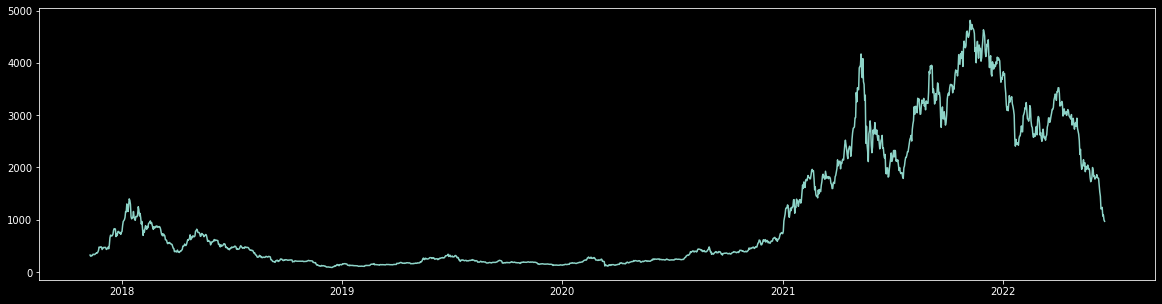

In [36]:
fig = plt.figure(figsize=(20,5))
plt.plot(df.index, df['Adj Close'])
plt.show();

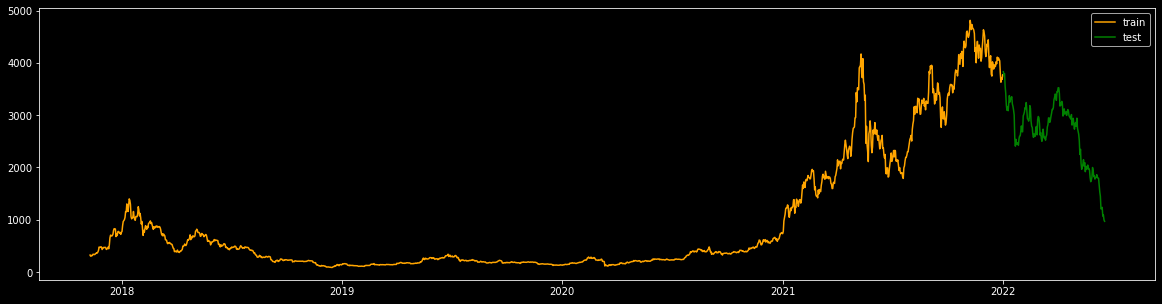

In [39]:
#train, test, split
to_row = int(len(df) * 0.9)
train_data = df[0:to_row]['Adj Close']
test_data = df[to_row:]['Adj Close']
fig = plt.figure(figsize=(20,5))
plt.plot(train_data, label='train', color='orange')
plt.plot(test_data, label='test', color='green')
plt.legend()
plt.show();

In [40]:
model_predictions = []
n_test_obs = len(test_data)
n_test_obs

169

In [46]:
train_data = list(train_data)
test_data = list(test_data)

for i in range(n_test_obs):
    model = sm.tsa.arima.ARIMA(train_data, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = list(output)[0]
    model_predictions.append(yhat)
    actual_test_value = test_data[i]
    train_data.append(actual_test_value)
    #print(output)
    #break

In [48]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1683
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -9763.454
Date:                Sun, 19 Jun 2022   AIC                          19536.909
Time:                        11:38:11   BIC                          19564.047
Sample:                             0   HQIC                         19546.961
                               - 1683                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0661      0.013     -5.129      0.000      -0.091      -0.041
ar.L2          0.0136      0.012      1.176      0.240      -0.009       0.036
ar.L3          0.0343      0.012      2.750      0.0

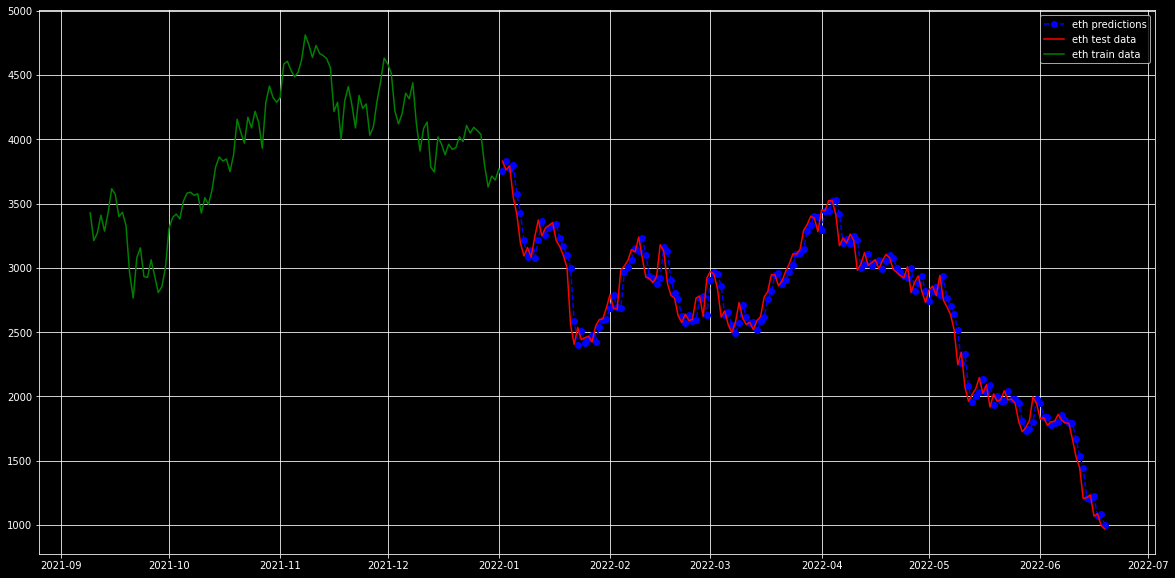

In [76]:
fig = plt.figure(figsize=(20,10))
plt.grid(True)
date_range = df[to_row:].index

plt.plot(date_range, model_predictions, label='eth predictions', color='blue', linestyle='dashed', marker='o')
plt.plot(date_range, test_data, label='eth test data', color='red')
plt.plot(pd.DataFrame(df[1400:to_row]['Adj Close']), label='eth train data', color='green')
plt.legend();

In [77]:
mape = np.mean(np.abs(np.array(model_predictions) - np.array(test_data)) / np.abs(test_data)) * 100
print('mape: ', round(float(mape), 2), '%')

mape:  3.53 %


In [50]:
len(test_data)

169

In [51]:
len(model_predictions)

169

In [64]:
train_data

[320.8840026855469,
 299.25299072265625,
 314.6809997558594,
 307.9079895019531,
 316.71600341796875,
 337.6310119628906,
 333.35699462890625,
 330.92401123046875,
 332.3940124511719,
 347.61199951171875,
 354.385986328125,
 366.7300109863281,
 360.4010009765625,
 380.6520080566406,
 410.1659851074219,
 474.9110107421875,
 466.2760009765625,
 471.3299865722656,
 480.3550109863281,
 472.9020080566406,
 427.52301025390625,
 447.114013671875,
 466.5400085449219,
 463.4490051269531,
 465.8529968261719,
 470.2040100097656,
 463.281005859375,
 428.5880126953125,
 434.4079895019531,
 456.031005859375,
 473.50201416015625,
 441.72100830078125,
 515.135986328125,
 651.4310302734375,
 702.7670288085938,
 695.8159790039062,
 684.447998046875,
 696.208984375,
 719.9749755859375,
 794.64501953125,
 826.822998046875,
 819.0859985351562,
 821.06298828125,
 674.8599853515625,
 719.3870239257812,
 694.1480102539062,
 765.833984375,
 773.8359985351562,
 762.8419799804688,
 737.0230102539062,
 753.591979

In [67]:
pd.DataFrame(df[0:to_row]['Adj Close'])

DatetimeIndex(['2017-11-09', '2017-11-10', '2017-11-11', '2017-11-12',
               '2017-11-13', '2017-11-14', '2017-11-15', '2017-11-16',
               '2017-11-17', '2017-11-18',
               ...
               '2021-12-23', '2021-12-24', '2021-12-25', '2021-12-26',
               '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30',
               '2021-12-31', '2022-01-01'],
              dtype='datetime64[ns]', name='Date', length=1515, freq=None)

In [79]:
from datetime import date

START = "2015-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

In [80]:
def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [81]:
data = load_data('BTC-USD')
data

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,310.914001,320.192993,310.210999,320.192993,320.192993,13942900
1,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
2,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
3,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
4,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
...,...,...,...,...,...,...,...
2722,2022-06-14,22487.986328,23018.951172,20950.818359,22206.792969,22206.792969,50913575242
2723,2022-06-15,22196.730469,22642.671875,20178.376953,22572.839844,22572.839844,54912007015
2724,2022-06-16,22576.304688,22868.921875,20265.226562,20381.650391,20381.650391,31183975654
2725,2022-06-17,20385.718750,21243.312500,20326.519531,20471.482422,20471.482422,27132421514
